# Bikesharing Assignment

#### Problem Statement
To build a multiple linear regression model for the prediction of demand for shared bikes. 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the economy restores to a healthy state. 

The company wants to know :
- Which variables are significant in predicting the demand for shared bikes.
-  How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the Bikesharing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
#pd.set_option('display.max_rows', None)

In [3]:
bikeshare=pd.read_csv("day.csv")
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikeshare.shape

(730, 16)

In [6]:
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data
Let's now spend some time in understanding the data.

If there is some obvious multicollinearity going on, we can identify here.
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

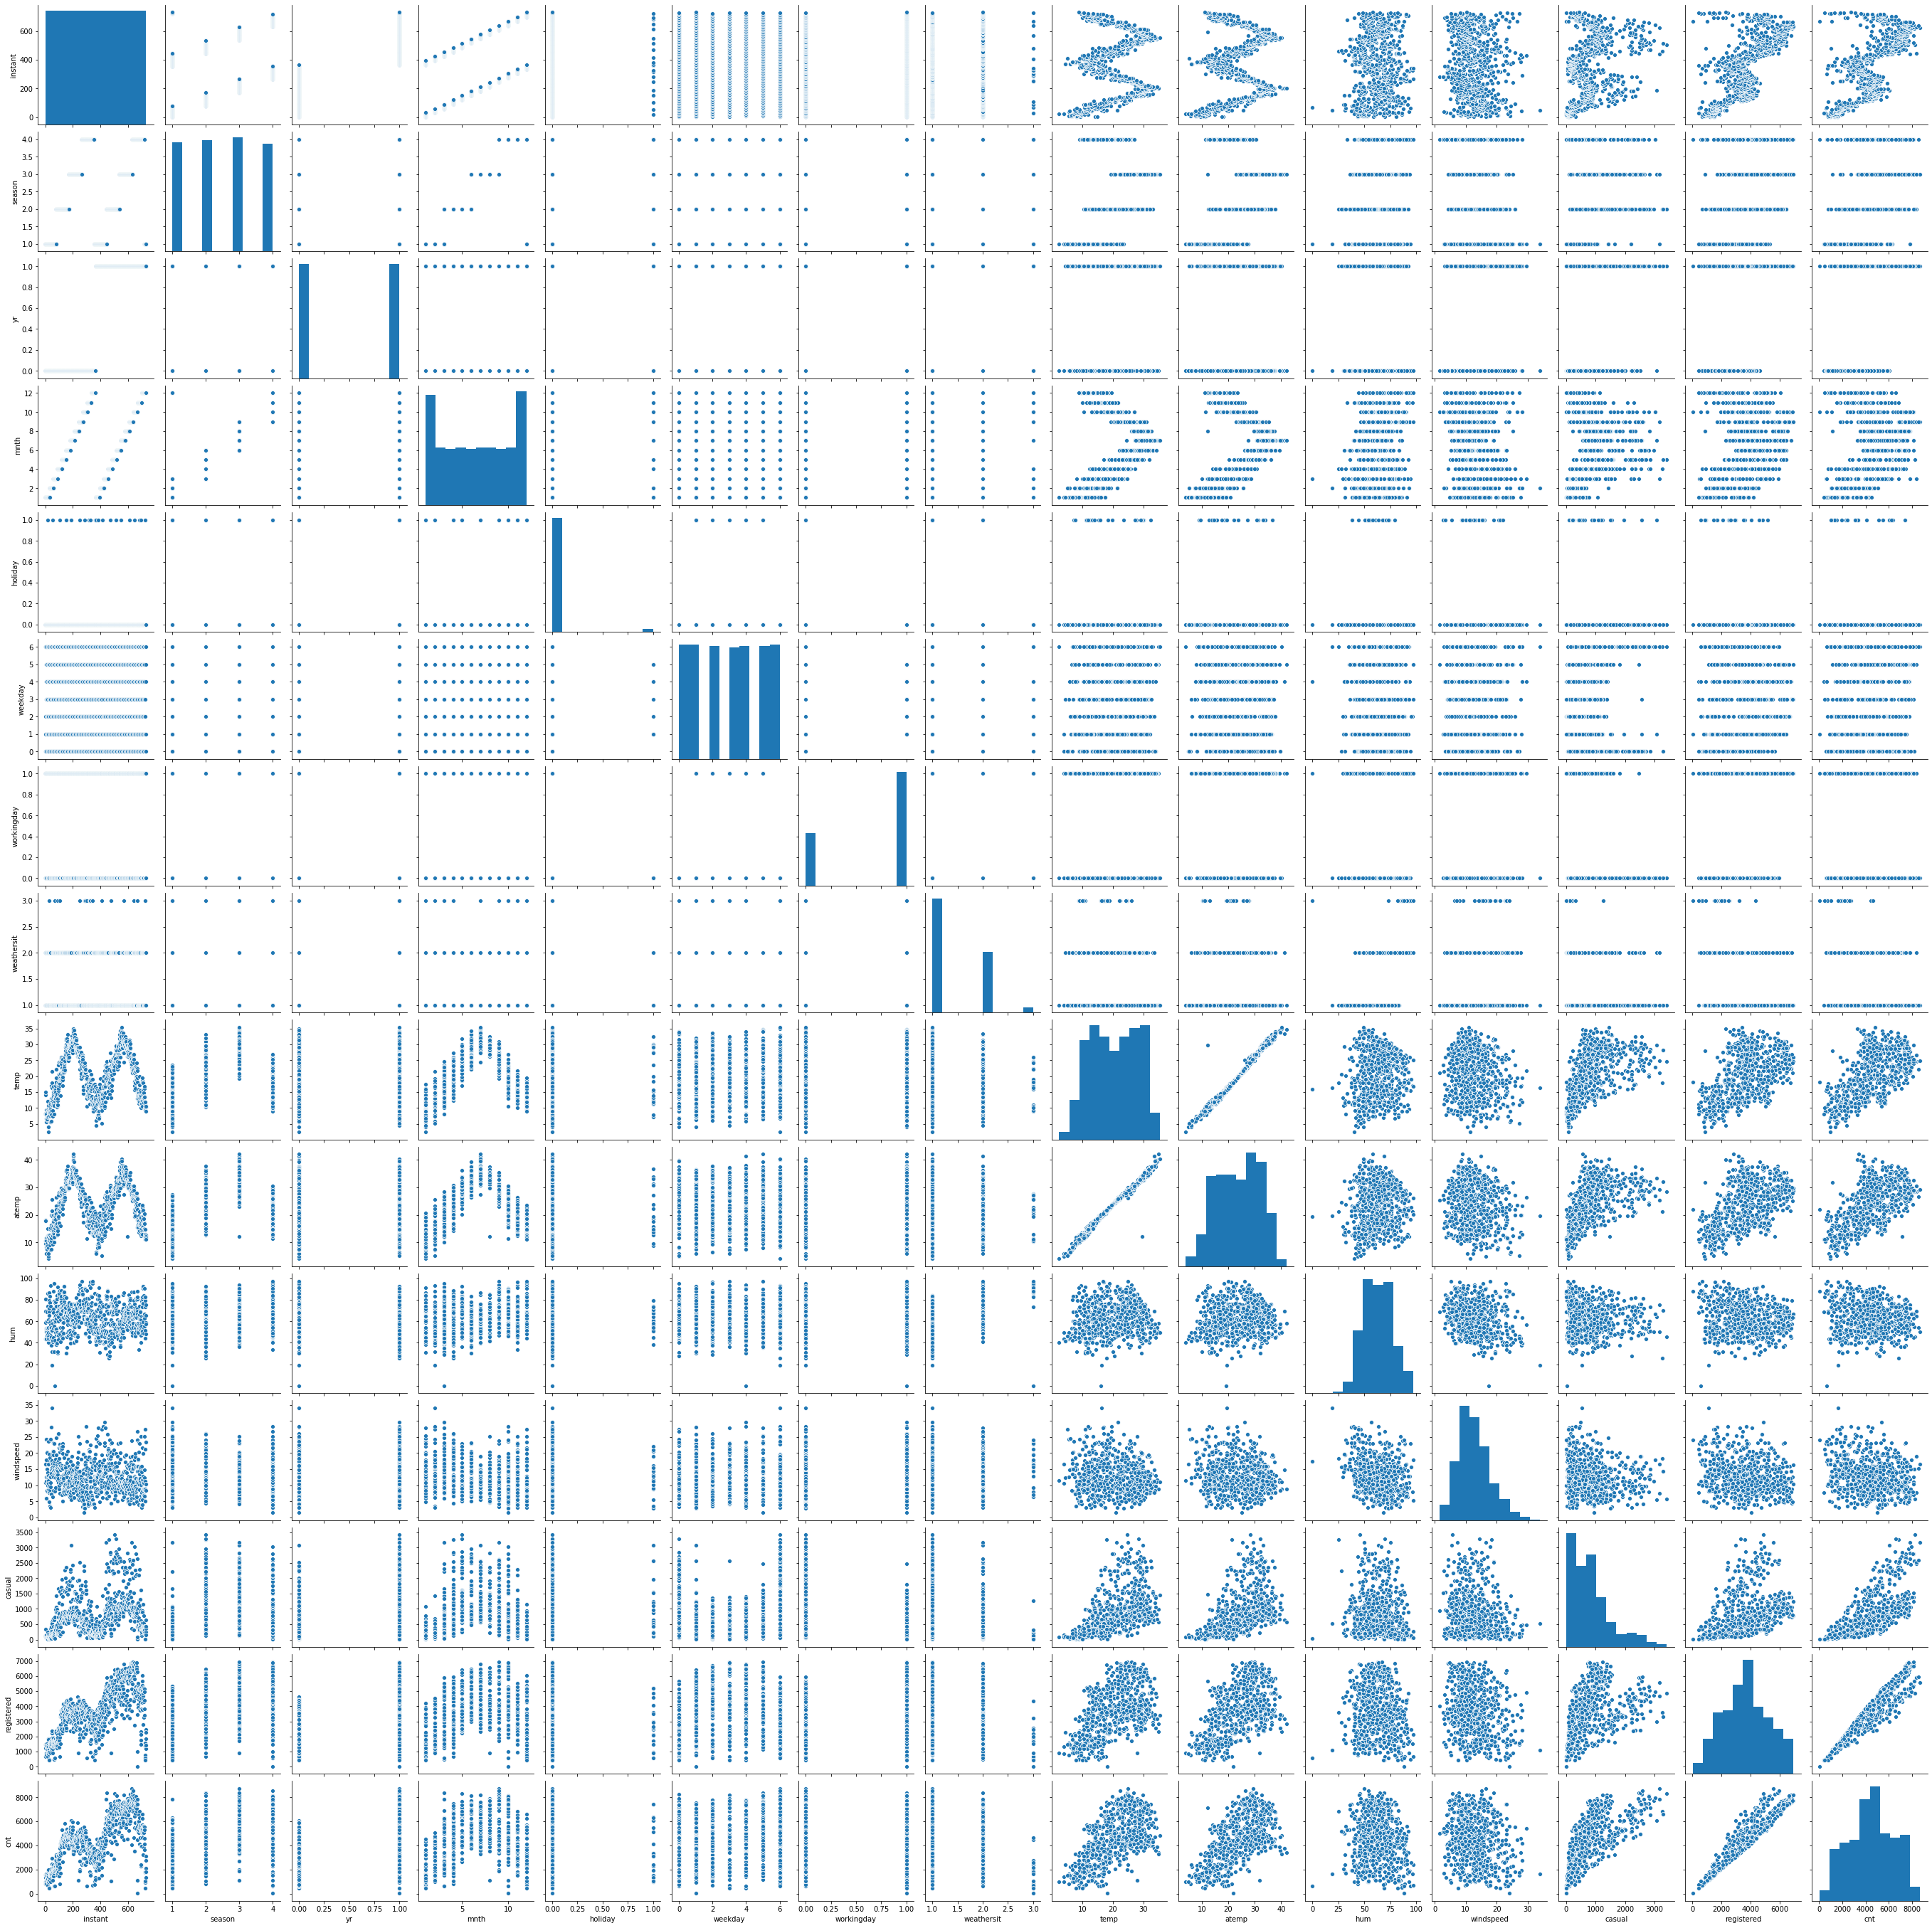

In [8]:
sns.pairplot(bikeshare)
plt.show()

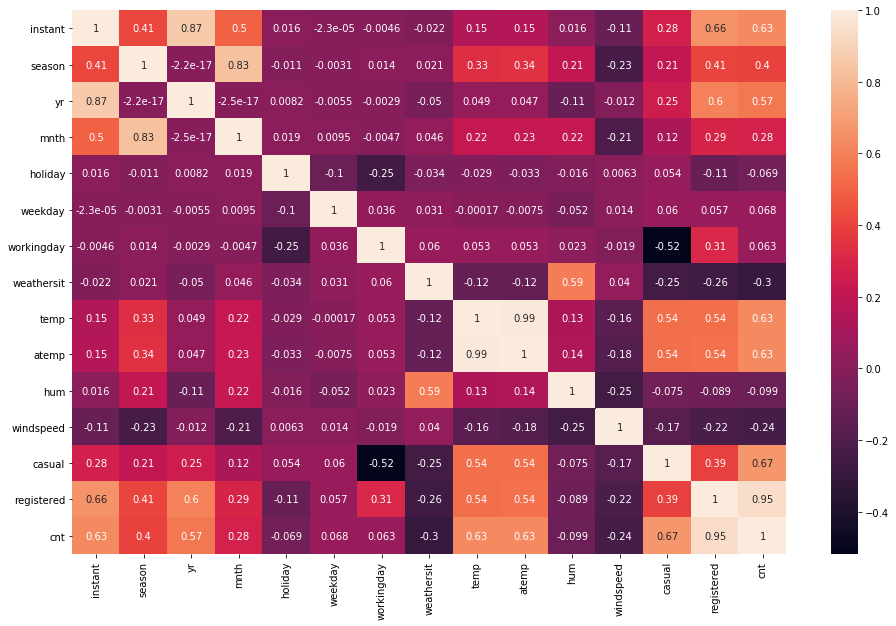

In [9]:
# To understand the correlation between the variables
plt.figure(figsize = (16, 10))
sns.heatmap(bikeshare.corr(),annot=True)

 From the heatmap, the correlation between the variables can be observed.
1. The target variable cnt is having highest correlation with temp/atemp variables. 
2. temp& atemp are highly correlated showing a correlation value=0.99, so either of them can be dropped.
3. Casual and registered can be removed as cnt represents the addition of those two variables. The same relation can be observed from the high correlation value=0.95 of registered and cnt variables.



For analysing the Categorical variables,they need to be modified to values given in the Data dictionary.

## Step 3: Data Preparation
### a) Dropping unnecessary variables:

The columns Instant and dteday can be dropped as they dont add any extra information in the process of prediction.Similarly the other two columns-Casual and registered are also redundant as the sum of those two columns is already mentioned as the cnt column. So, these two columns can also be dropped. 

In [10]:
#Dropping unnecessary variables
bikeshare.drop(['instant'],axis=1,inplace=True)
bikeshare.drop(['dteday'],axis=1,inplace=True)
bikeshare.drop(['casual'],axis=1,inplace=True)
bikeshare.drop(['registered'],axis=1,inplace=True)
bikeshare.drop(['atemp'],axis=1,inplace=True)
bikeshare

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796


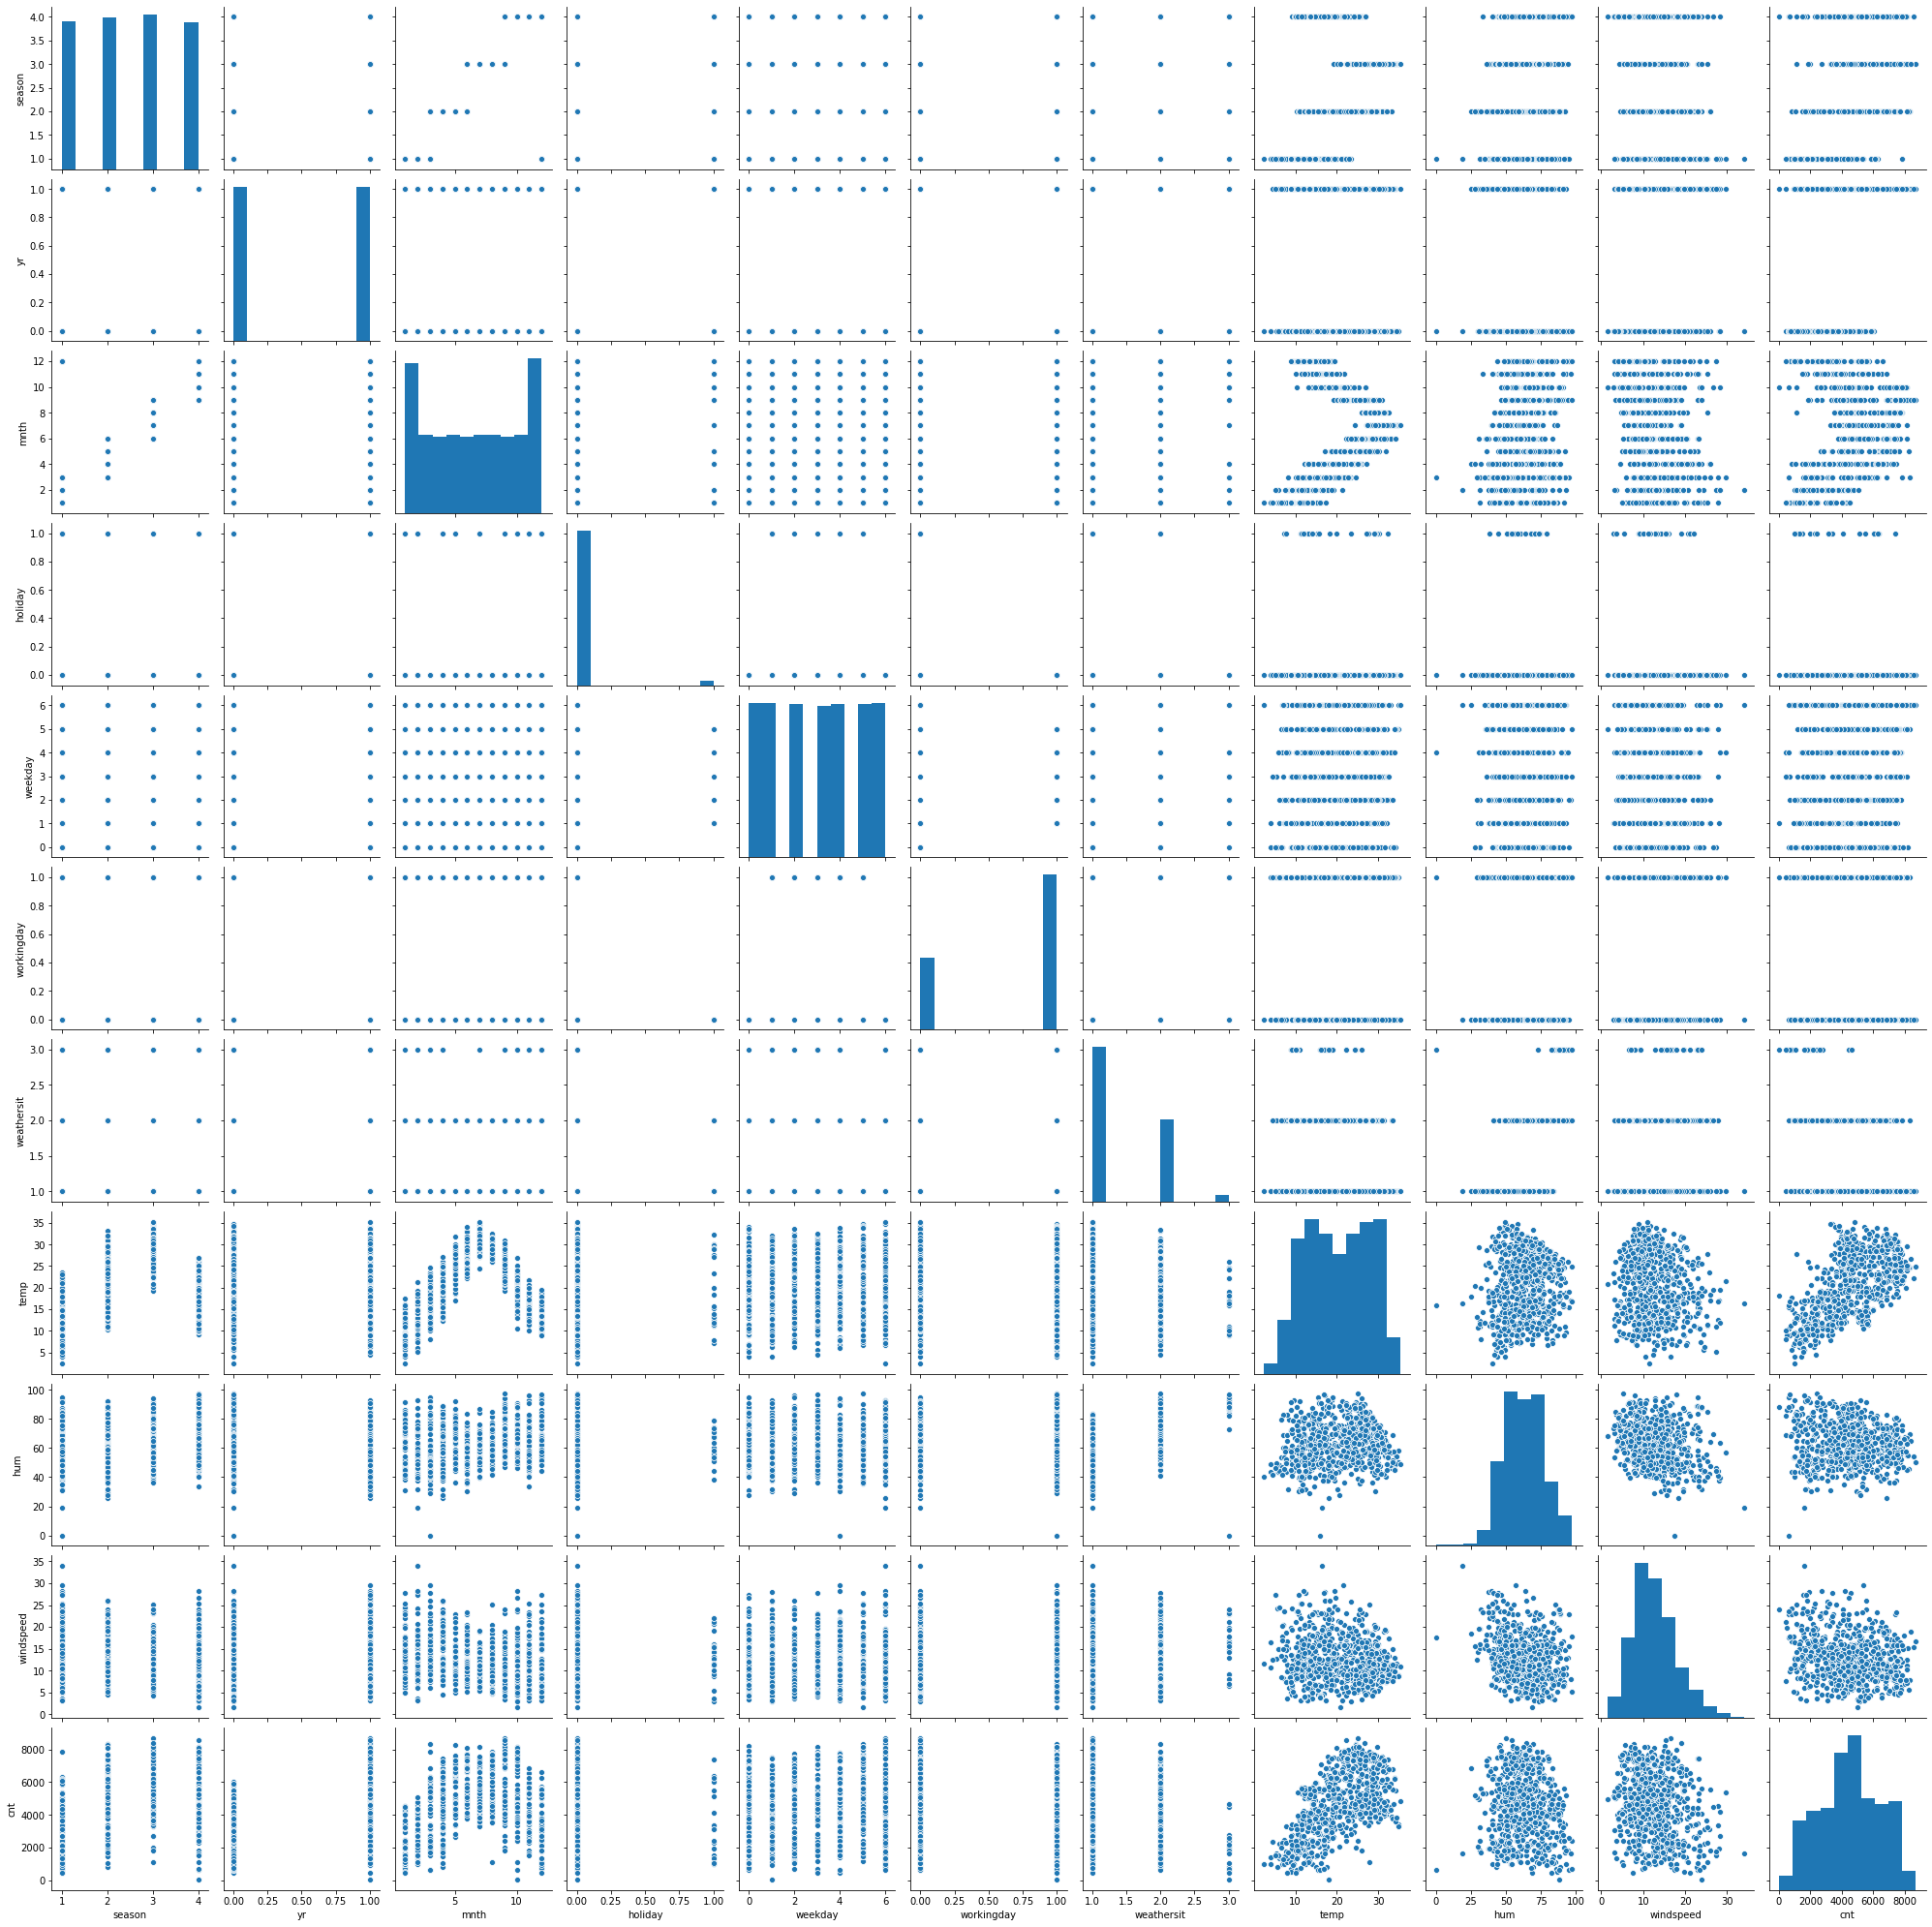

In [11]:
# Pirplot after dropping the unnecessary variables to check correlation
sns.pairplot(bikeshare)
plt.show()

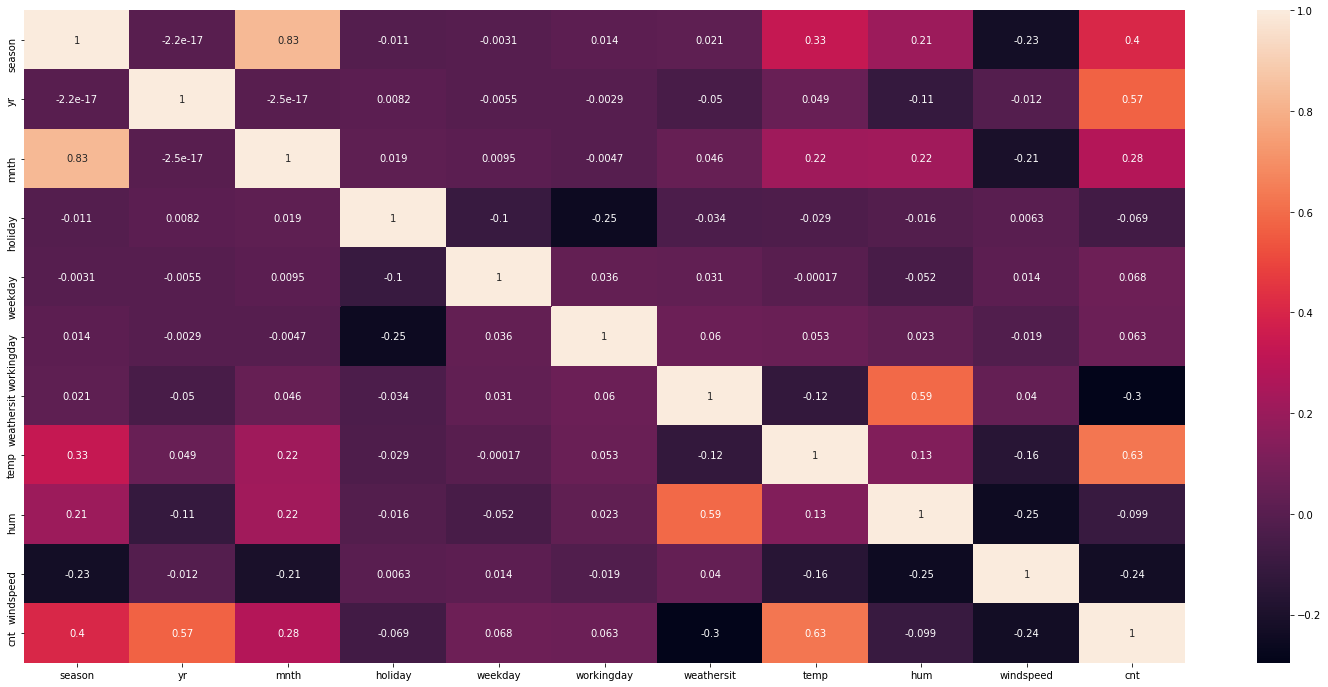

In [12]:
# To understand the correlation between the variables(after dropping unnecessary variables)
plt.figure(figsize = (26, 12))
sns.heatmap(bikeshare.corr(),annot=True)

After removing the redundant variables,we can observe from the pair plot and the heatmap that the temp variable is highly correlated with the target variable cnt, with a correlation value=0.63
It indicates that it is going to be an important parameter in our analysis.

 ### b) Checking the data type of columns & making necessary changes

In [13]:
bikeshare.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [14]:
#Making necessary changes
# Mapping Season to values
# Defining the map function
def season_map(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})

# Applying the function to the season column
bikeshare['season']=bikeshare[['season']].apply(season_map)

bikeshare

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,spring,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,spring,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,spring,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796


In [15]:
#Mapping Month column
def month_map(x):
    return x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
# Applying the function to month column
bikeshare['mnth']=bikeshare[['mnth']].apply(month_map)
                            
bikeshare

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,4,1,2,10.420847,65.2917,23.458911,2114
726,spring,1,dec,0,5,1,2,10.386653,59.0000,10.416557,3095
727,spring,1,dec,0,6,0,2,10.386653,75.2917,8.333661,1341
728,spring,1,dec,0,0,0,1,10.489153,48.3333,23.500518,1796


In [16]:
#mapping weekday
def week_map(x):
    return x.map({0:'sun',1:'mon',2:'tues',3:'wednes',4:'thurs',5:'fri',6:'satur'})
# Applying the function to month column
bikeshare['weekday']=bikeshare[['weekday']].apply(week_map)
                            
bikeshare

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,satur,0,2,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,2,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wednes,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,thurs,1,2,10.420847,65.2917,23.458911,2114
726,spring,1,dec,0,fri,1,2,10.386653,59.0000,10.416557,3095
727,spring,1,dec,0,satur,0,2,10.386653,75.2917,8.333661,1341
728,spring,1,dec,0,sun,0,1,10.489153,48.3333,23.500518,1796


In [17]:
# mapping weathersit column
def weather_map(x):
    return x.map({1:'clear',2:'mist+cloudy',3:'light snow/rain',4:'heavy rain+mist/snow'})

# Applying the function to weathersit column
bikeshare['weathersit']=bikeshare[['weathersit']].apply(weather_map)
bikeshare

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,satur,0,mist+cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist+cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wednes,1,clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,thurs,1,mist+cloudy,10.420847,65.2917,23.458911,2114
726,spring,1,dec,0,fri,1,mist+cloudy,10.386653,59.0000,10.416557,3095
727,spring,1,dec,0,satur,0,mist+cloudy,10.386653,75.2917,8.333661,1341
728,spring,1,dec,0,sun,0,clear,10.489153,48.3333,23.500518,1796


In [18]:
bikeshare.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

### Visualizing the categorical variables (after making necessary changes)

The categorical variables are plotted against the target variable(dependent variable) to understand their effect on it. 
Box plots are best suited for this analysis.


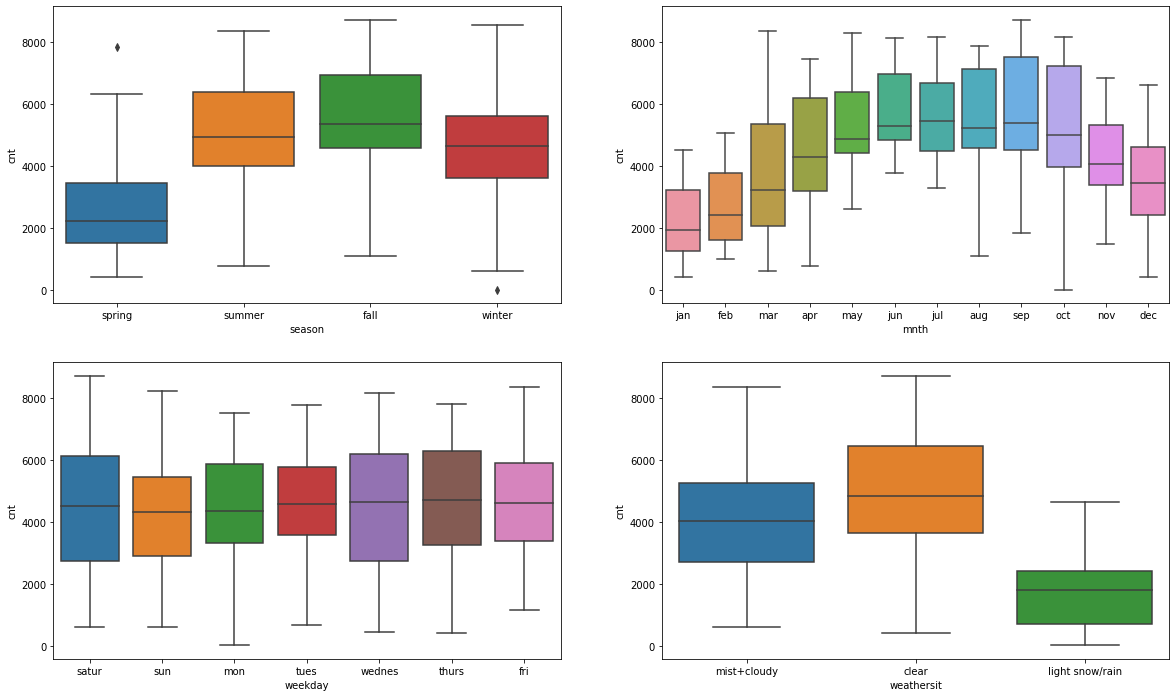

In [19]:
# Visualising the categorical variables, to understand their effect on dependant variable(cnt)
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeshare)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeshare)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeshare)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeshare)
plt.show()

From the plots, we can propose the following:
    1. Weekday do not have any significant impact on the cnt, as the median of all boxes lie almoost in a same line (between 4000 and 6000)
    2. The cnt is high in Fall and  summer ,followed by winter. It is lowest in spring.
    3. The cnt is high in the month of september and lowest median value is observed in the month of January.And the trend in mnth tally with that of season variable.
    4. From the weathersit variable, we can say that cnt is maximum  when the sky is clear,filled with few clouds or partially cloudy.least cnt is observed when light snow,light rain+Thunderstorm+scattered clouds
       light rain+scattered clouds are seen.
    5. No cnt (i.e., No bikes were used )registered when there is heavy rain+ Ice pallets+Thunderstorm+Mist+Snow+Fog conditions are observed.
    

### c) Dummy variables

In [20]:
#Creating dummy variable for season column
Season=pd.get_dummies(bikeshare['season'],drop_first=True)
#concatenating dummy with main dataframe
bikeshare=pd.concat([bikeshare,Season],axis=1)
# dropping the old column
bikeshare=bikeshare.drop('season',axis=1)
bikeshare.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,satur,0,mist+cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,jan,0,sun,0,mist+cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,jan,0,tues,1,clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,jan,0,wednes,1,clear,9.305237,43.6957,12.522300,1600,1,0,0


In [21]:
# Creating dummy variable for month
Month=pd.get_dummies(bikeshare['mnth'],drop_first=True)
#concatenating dummy with main dataframe
bikeshare=pd.concat([bikeshare,Month],axis=1)
# dropping the old column
bikeshare=bikeshare.drop('mnth',axis=1)
bikeshare.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,satur,0,mist+cloudy,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sun,0,mist+cloudy,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,mon,1,clear,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tues,1,clear,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wednes,1,clear,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [22]:
# Creating dummy variable for weekday
Weekday=pd.get_dummies(bikeshare['weekday'],drop_first=True)
#concatenating dummy with main dataframe
bikeshare=pd.concat([bikeshare,Weekday],axis=1)
# dropping the old column
bikeshare=bikeshare.drop('weekday',axis=1)
bikeshare.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,satur,sun,thurs,tues,wednes
0,0,0,0,mist+cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,mist+cloudy,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
# Creating dummy variable for weathersit
Weather=pd.get_dummies(bikeshare['weathersit'],drop_first=True)
#concatenating dummy with main dataframe
bikeshare=pd.concat([bikeshare,Weather],axis=1)
# dropping the old column
bikeshare=bikeshare.drop('weathersit',axis=1)
bikeshare.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,satur,sun,thurs,tues,wednes,light snow/rain,mist+cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(bikeshare,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features
 - using Minmax Scaling
 - The columns temp,hum and windspeed are having larger values when compared to the other predictor variables.so, they need to be scaled.

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [26]:
#list of columns need to be scaled
num_vars=['temp','hum','windspeed','cnt']
# apply scaler of the list of columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,satur,sun,thurs,tues,wednes,light snow/rain,mist+cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,satur,sun,thurs,tues,wednes,light snow/rain,mist+cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


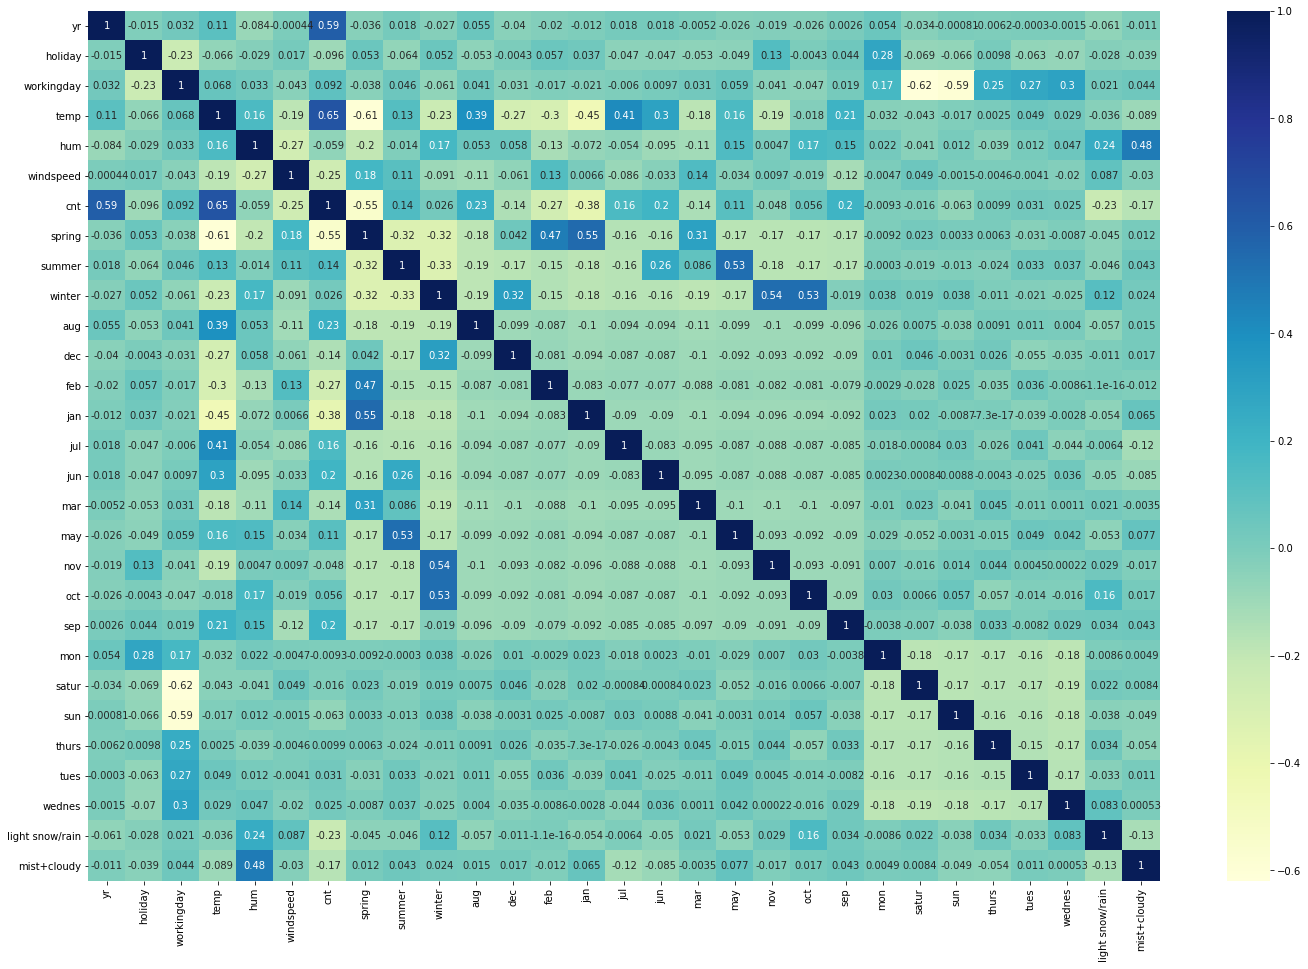

In [29]:
# Checking correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (24, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

1. As observed from the heat map, cnt and temp is highly correlated with a coefficient value = 0.65 and next is cnt and yr with coefficient value= 0.59
2. High correlation is also observed between the months associated with a particular season.
3. similarly more negative values of correlation are observed between temp and winter,spring variables, indicating low temparatures in winter and spring.

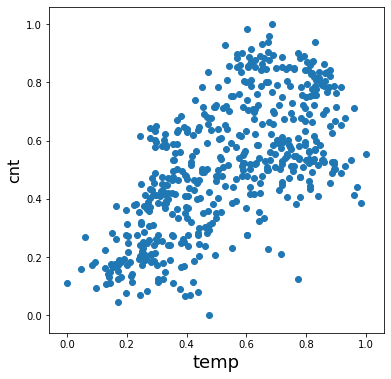

In [30]:
#Pair plot between cnt vs temp, 

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.xlabel('temp', fontsize=18)                          # X-label
plt.ylabel('cnt', fontsize=16) 
plt.show()

So, we pick temp as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train
print(y_train)

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64


## Step 5: Building a Linear model

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (Recursive Feature Elimination)

### RFE

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output number of the variables equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)  # running RFE


rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', False, 9),
 ('feb', False, 4),
 ('jan', False, 13),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 3),
 ('may', False, 2),
 ('nov', False, 6),
 ('oct', True, 1),
 ('sep', True, 1),
 ('mon', False, 5),
 ('satur', True, 1),
 ('sun', True, 1),
 ('thurs', False, 8),
 ('tues', False, 7),
 ('wednes', False, 11),
 ('light snow/rain', True, 1),
 ('mist+cloudy', True, 1)]

In [35]:
# Columns of interest
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'jul', 'oct', 'sep', 'satur', 'sun', 'light snow/rain',
       'mist+cloudy'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['summer', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'mon',
       'thurs', 'tues', 'wednes'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [37]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [40]:
# summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.14e-189
Time:                        14:15:21   Log-Likelihood:                 513.48
No. Observations:                 510   AIC:                            -997.0
Df Residuals:                     495   BIC:                            -933.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2536      0.026     

'holiday' ,having the higher p value of 0.846 is insignifiicant in the presence of other variables. So it can be dropped

In [41]:
X_train_new=X_train_rfe.drop(['holiday'],axis=1)

Rebuilding the model without 'holiday'

In [42]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [43]:
#running the linear model
lm=sm.OLS(y_train,X_train_lm).fit()

In [44]:
#printing the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.14e-189
Time:                        14:15:21   Log-Likelihood:                 513.48
No. Observations:                 510   AIC:                            -997.0
Df Residuals:                     495   BIC:                            -933.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2494      0.040     

Now,all the variables are having p_value <0.05 , indicating they are significant.

In [45]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'jul', 'oct', 'sep', 'satur', 'sun', 'light snow/rain',
       'mist+cloudy'],
      dtype='object')

In [46]:
X_train_new = X_train_new.drop(['const'], axis=1)
X_train_new

,yr,workingday,temp,hum,windspeed,spring,winter,jul,oct,sep,satur,sun,light snow/rain,mist+cloudy
576,1,1,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,1,0,0,1
111,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,1,0,0,0,1,0,0,1
79,0,1,0.462664,0.759870,0.529881,0,0,0,0,0,0,0,0,1


### VIF 
Variance Inflation Factor

In [47]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.29
2,temp,17.84
1,workingday,17.07
10,satur,4.60
4,windspeed,4.52
11,sun,4.47
6,winter,2.83
5,spring,2.81
13,mist+cloudy,2.29
0,yr,2.08


The variables with VIF values >10 indicate high collinearity . 
The variables hum,temp,working day are having VIF >10. We are required to drop one variable at a time and observe the change in VIF values.


In [48]:
#Dropping the 'hum' variable
X_train_new = X_train_new.drop(['hum'], axis=1)
X_train_new

,yr,workingday,temp,windspeed,spring,winter,jul,oct,sep,satur,sun,light snow/rain,mist+cloudy
576,1,1,0.815169,0.264686,0,0,1,0,0,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,1,0,0,1
728,1,0,0.245101,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.188475,0,0,0,0,0,1,0,0,1
111,0,1,0.345824,0.380981,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0
53,0,1,0.202618,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,0,0,0,1,0,0,1
79,0,1,0.462664,0.529881,0,0,0,0,0,0,0,0,1


In [49]:
#Checking for VIF again after removing hum variable
vif1=pd.DataFrame()
X1 = X_train_new
vif1['Features'] = X1.columns
vif1['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,Features,VIF
1,workingday,13.37
2,temp,12.79
3,windspeed,4.48
9,satur,3.82
10,sun,3.57
4,spring,2.46
5,winter,2.40
0,yr,2.07
7,oct,1.61
12,mist+cloudy,1.58


Rebuilding the model after removing 'hum'

In [50]:
# adding constant
X_train_lm = sm.add_constant(X_train_new)
#running the linear model
lm=sm.OLS(y_train,X_train_lm).fit()
#printing summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.18e-187
Time:                        14:15:21   Log-Likelihood:                 505.28
No. Observations:                 510   AIC:                            -982.6
Df Residuals:                     496   BIC:                            -923.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1671      0.035     

Still ,variables with VIF>10 exists.

In [51]:
#Dropping the 'workingday' variable,having VIF>10
X_train_new = X_train_new.drop(['workingday'], axis=1)
X_train_new

,yr,temp,windspeed,spring,winter,jul,oct,sep,satur,sun,light snow/rain,mist+cloudy
576,1,0.815169,0.264686,0,0,1,0,0,0,0,0,0
426,1,0.442393,0.255342,1,0,0,0,0,1,0,0,1
728,1,0.245101,0.663106,1,0,0,0,0,0,1,0,0
482,1,0.395666,0.188475,0,0,0,0,0,1,0,0,1
111,0,0.345824,0.380981,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0
53,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0
350,0,0.248216,0.431816,0,1,0,0,0,1,0,0,1
79,0,0.462664,0.529881,0,0,0,0,0,0,0,0,1


In [52]:
#Checking for VIF again after removing 'workingday' variable
vif2=pd.DataFrame()
X2 = X_train_new
vif2['Features'] = X2.columns
vif2['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,Features,VIF
1,temp,4.79
2,windspeed,4.05
0,yr,2.06
4,winter,1.90
3,spring,1.66
6,oct,1.58
11,mist+cloudy,1.52
5,jul,1.36
7,sep,1.22
8,satur,1.22


Now, all the variables are having VIF<5 indicating less multicollinearity.

In [53]:
# adding constant
X_train_lm = sm.add_constant(X_train_new)
#running the linear model
lm=sm.OLS(y_train,X_train_lm).fit()
#printing summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.89e-185
Time:                        14:15:21   Log-Likelihood:                 497.45
No. Observations:                 510   AIC:                            -968.9
Df Residuals:                     497   BIC:                            -913.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2669      0.025     

In [54]:
#Drop 'satur' having high p-value
X_train_new = X_train_new.drop(['satur'], axis=1)
X_train_new

,yr,temp,windspeed,spring,winter,jul,oct,sep,sun,light snow/rain,mist+cloudy
576,1,0.815169,0.264686,0,0,1,0,0,0,0,0
426,1,0.442393,0.255342,1,0,0,0,0,0,0,1
728,1,0.245101,0.663106,1,0,0,0,0,1,0,0
482,1,0.395666,0.188475,0,0,0,0,0,0,0,1
111,0,0.345824,0.380981,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1,0.863973,0.187140,0,0,0,0,0,0,0,0
53,0,0.202618,0.111379,1,0,0,0,0,0,0,0
350,0,0.248216,0.431816,0,1,0,0,0,0,0,1
79,0,0.462664,0.529881,0,0,0,0,0,0,0,1


build a model again

In [55]:
# adding constant
X_train_lm = sm.add_constant(X_train_new)
#running the linear model
lm=sm.OLS(y_train,X_train_lm).fit()
#printing summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.47e-186
Time:                        14:15:21   Log-Likelihood:                 496.56
No. Observations:                 510   AIC:                            -969.1
Df Residuals:                     498   BIC:                            -918.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2697      0.024     

In [56]:
#Drop 'winter' having p-value>0.05
X_train_new = X_train_new.drop(['winter'], axis=1)
X_train_new

,yr,temp,windspeed,spring,jul,oct,sep,sun,light snow/rain,mist+cloudy
576,1,0.815169,0.264686,0,1,0,0,0,0,0
426,1,0.442393,0.255342,1,0,0,0,0,0,1
728,1,0.245101,0.663106,1,0,0,0,1,0,0
482,1,0.395666,0.188475,0,0,0,0,0,0,1
111,0,0.345824,0.380981,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
578,1,0.863973,0.187140,0,0,0,0,0,0,0
53,0,0.202618,0.111379,1,0,0,0,0,0,0
350,0,0.248216,0.431816,0,0,0,0,0,0,1
79,0,0.462664,0.529881,0,0,0,0,0,0,1


In [57]:
# adding constant
X_train_lm = sm.add_constant(X_train_new)
#running the linear model
lm=sm.OLS(y_train,X_train_lm).fit()
#printing summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.67e-186
Time:                        14:15:21   Log-Likelihood:                 494.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2989      0.019     

## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed ( one of the major assumptions of linear regression), plot the histogram of the error terms.

In [58]:
y_train_pred = lm.predict(X_train_lm)

In [59]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

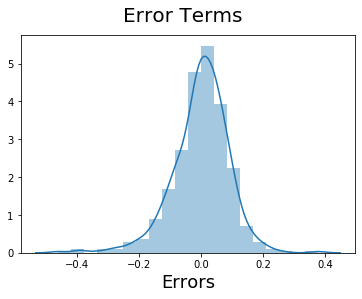

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The distribution of errors is following a normal distribution having a mean=0, which satisfies the assumptions.

## Making Predictions


### Applying Scaling on the Test sets

In [61]:
num_vars=['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [62]:
y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
# Now, Use model for predictions

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new

,const,yr,temp,windspeed,spring,jul,oct,sep,sun,light snow/rain,mist+cloudy
184,1.0,0,0.831783,0.084219,0,1,0,0,0,0,1
535,1.0,1,0.901354,0.153728,0,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,0,1,0,0,0,1
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0.519232,0.283397,0,0,0,0,0,0,0
127,1.0,0,0.584649,0.069510,0,0,0,0,1,0,0
640,1.0,1,0.745598,0.052115,0,0,1,0,0,0,1
72,1.0,0,0.331557,0.203418,1,0,0,0,0,0,0


In [64]:
# Making predictions
y_pred = lm.predict(X_test_new)
y_pred

184    0.472221
535    0.871824
299    0.428944
221    0.600282
152    0.545014
         ...   
702    0.699842
127    0.476552
640    0.800294
72     0.264110
653    0.750439
Length: 220, dtype: float64

Text(0, 0.5, 'cnt')

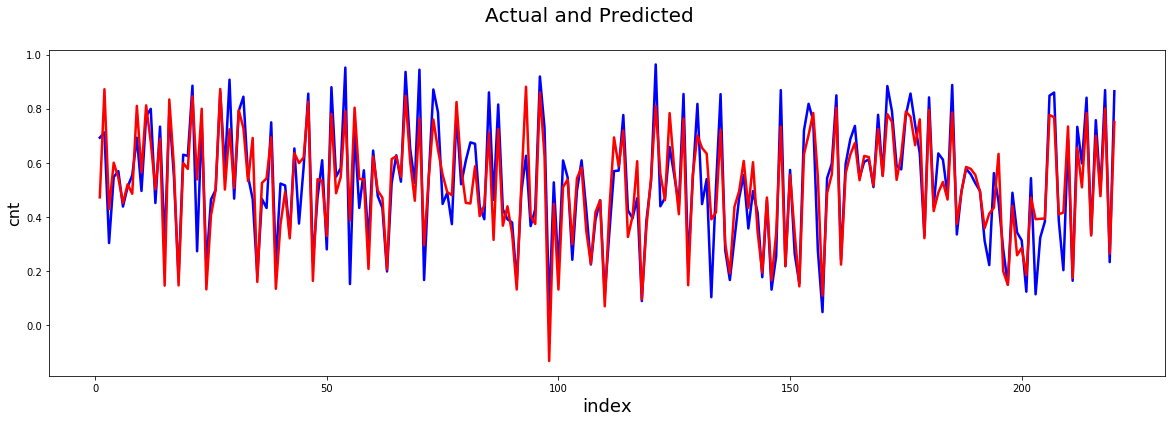

In [66]:
#Actual vs Predicted
c = [i for i in range(1,221,1)]
fig=plt.figure(figsize=[20,6])
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16)                               # Y-label

- The above plot indicates that the  actual and predicted patterns are very close and the model is decent.

Text(0, 0.5, 'y_test-y_pred')

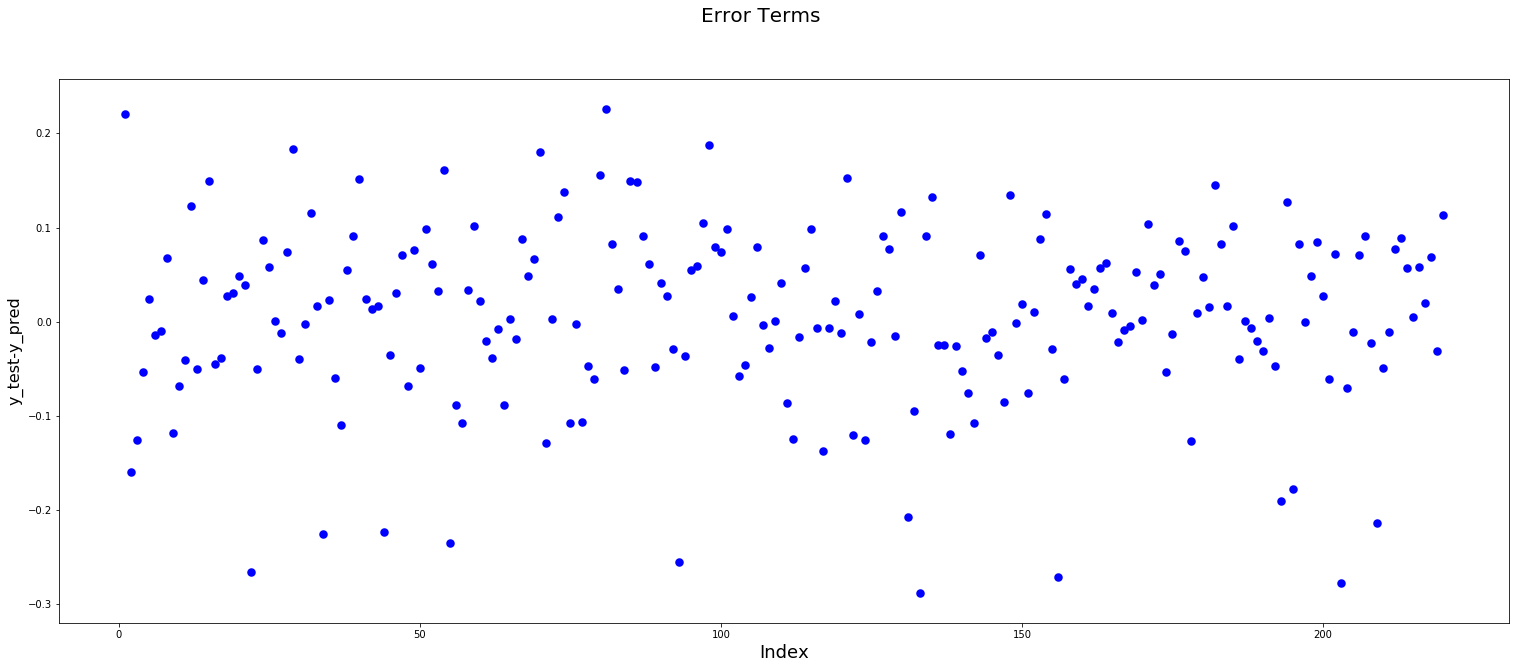

In [70]:
# Error terms
c = [i for i in range(1,221,1)]
fig = plt.figure(figsize=[26,10])
plt.scatter(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_test-y_pred', fontsize=16)                # Y-label

The Plot of errors indicates that they are random in nature and no specific pattern is observed.It indicates that the errors are independent of each other, there by validating one of Linear regression assumptions.

## Model Evaluation

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [ ]:
#r2_score for the training set
r2_score(y_train,y_train_pred)

In [ ]:
#r2_score and mse for the test set
from sklearn.metrics import r2_score,mean_squared_error

r_square=r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(r_square)
print(mse)

1. The R2 value of the test set is 0.817 indicating it could able to model 81.7 % of data accurately.
2. The difference between the R2 vallues of training set and test set are having a very small difference of 0.006.
3. A mse of 0.0087 indicates that the error is only 0.87% which is very small .
4. The difference between R2 and Adj.R2 is 0.004 for the training set , which is very good.
5. The p value for the F-Stat is 1.67e-186, which is a very small value,which is also a good sign.

   All the above results indicate that the final model is a decent model.


- We can frame that the equation of our best fitted line is:

- cnt = 0.2989+0.2359× yr +0.3994×temp-0.1494 ×windspeed - 0.1368×spring – 0.0649×jul +0.0569 × oct+ 0.0588×sep – 0.0455 ×sun – 0.2925× (light snow/rain) - 0.0814 ×(mist+cloudy)

From this equation , we can conclude the top 3 features significantly explaining the demand of the shared bikes are:
- i.	Temp
- ii.	Yr
- iii.Light snow/rain  -  (light snow,light rain+Thunderstorm+scattered clouds,light rain+scattered clouds)
- The first two are having positive coefficients thereby effecting the demand in a positive way, whereas the third variable having a negative coefficient indicates that it is affecting in an opposite way.
- i.e., Demand of shared bikes is increasing with an increased value in temperature(temp) and Year(yr), whereas the demand is decreasing during the weathersit indicated indicated by the third variable(Light snow/rain - (light snow,light rain+Thunderstorm+scattered clouds,light rain+scattered clouds).



